In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Tập dữ liệu train.csv bao gồm các thông số:
### 1. **Item_Weight**:
   - Trọng lượng của sản phẩm.

### 2. **Item_Visibility**:
   - Độ phổ biến của sản phẩm (có thể đo bằng tỷ lệ sản phẩm được trưng bày trong cửa hàng).

### 3. **Item_MRP**:
   - Giá bán lẻ tối đa (MRP - Maximum Retail Price) của sản phẩm.

### 4. **Outlet_Establishment_Year**:
   - Năm thành lập cửa hàng bán lẻ.

### 5. **Item_Outlet_Sales**:
   - Doanh số bán hàng của sản phẩm tại cửa hàng.

### 6. **Item_Fat_Content_LF, Item_Fat_Content_Low Fat, Item_Fat_Content_Regular, Item_Fat_Content_low fat, Item_Fat_Content_reg**:
   - Các biến này đại diện cho nội dung chất béo của sản phẩm, với các giá trị như "Low Fat" (ít béo) và "Regular" (bình thường). Có thể những cột này là các biến giả (one-hot encoding) cho các danh mục khác nhau của thuộc tính chất béo.

### 7. **Item_Type_Baking Goods, Item_Type_Breads, Item_Type_Breakfast, etc.**:
   - Các cột này đại diện cho loại sản phẩm. Đây cũng là các biến giả, mỗi cột đại diện cho một loại sản phẩm như "Baking Goods" (đồ nướng), "Breads" (bánh mì), "Breakfast" (bữa sáng), v.v.

### 8. **Outlet_Size_High, Outlet_Size_Medium, Outlet_Size_Small**:
   - Các biến giả này đại diện cho kích thước của cửa hàng (lớn, trung bình, nhỏ).

### 9. **Outlet_Location_Type_Tier 1, Outlet_Location_Type_Tier 2, Outlet_Location_Type_Tier 3**:
   - Đại diện cho cấp độ vị trí của cửa hàng (ví dụ: thành phố lớn, khu vực đô thị nhỏ, khu vực nông thôn).

### 10. **Outlet_Type_Grocery Store, Outlet_Type_Supermarket Type1, Outlet_Type_Supermarket Type2, Outlet_Type_Supermarket Type3**:
   - Các biến giả đại diện cho loại cửa hàng: cửa hàng tạp hóa hoặc các loại siêu thị khác nhau.

In [3]:
print('First 5 rows of training data:\n', train_data.head())

print('\nShape of training data:', train_data.shape)
print('Shape of testing data:', test_data.shape)

First 5 rows of training data:
    Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year   
0     6.800000         0.037490   48.6034                       2004  \
1    15.600000         0.172597  114.8518                       1997   
2    12.911575         0.054721  107.8254                       1985   
3    11.800000         0.098312   81.4618                       1998   
4    17.850000         0.046600  125.1388                       2004   

   Item_Outlet_Sales  Item_Fat_Content_LF  Item_Fat_Content_Low Fat   
0           291.6204                    0                         1  \
1          2163.1842                    0                         1   
2          2387.5588                    0                         1   
3           161.1236                    0                         1   
4          1981.4208                    0                         0   

   Item_Fat_Content_Regular  Item_Fat_Content_low fat  Item_Fat_Content_reg   
0                         0  

In [4]:
train_x = train_data.drop(columns=['Item_Outlet_Sales'], axis=1)
train_y = train_data['Item_Outlet_Sales']

test_x = test_data.drop(columns=['Item_Outlet_Sales'], axis=1)
test_y = test_data['Item_Outlet_Sales']

In [5]:
#training model by LinerRegression:
model = LinearRegression()
model.fit(train_x, train_y)

print('\nCoefficients of model:', model.coef_)
print('Intercept of model:', model.intercept_)


Coefficients of model: [-3.84197604e+00  9.83065945e+00  1.61711856e+01  6.09197622e+01
 -8.64161561e+01  1.23593376e+02  2.34714039e+02 -2.44597425e+02
 -2.72938329e+01 -8.09611456e+00 -3.01147840e+02  1.70727611e+02
 -5.40194744e+01  7.34248834e+01  1.70313375e+00 -5.07701615e+01
  1.63553657e+02 -5.85286125e+01  1.04913492e+02 -6.01944874e+01
  1.98948206e+02 -1.40959023e+02  1.19426257e+02  2.66382669e+01
 -1.85619792e+02  1.43925357e+03  2.16134663e+02  3.54723990e+01
  3.54832996e+02 -5.54559635e+00 -3.49287400e+02 -1.39202954e+03
 -2.57982359e+02 -9.59016062e+02  2.60902796e+03]
Intercept of model: -121926.97473297735


In [6]:
predict_train = model.predict(train_x)
rmse_train = mean_squared_error(train_y, predict_train)**(0.5)
print('\nPredicted Item_Outlet_Sales on training data:\n', predict_train)
print('RMSE on training dataset:', rmse_train)

predict_test = model.predict(test_x)
rmse_test = mean_squared_error(test_y, predict_test)**(0.5)
print('\nPredicted Item_Outlet_Sales on test data:\n', predict_test)
print('RMSE on test dataset:', rmse_test)


Predicted Item_Outlet_Sales on training data:
 [ 803.88817641 1733.98835979 3294.52154482 ...  811.16967914 2343.96927185
 2444.98869913]
RMSE on training dataset: 1135.8159344155245

Predicted Item_Outlet_Sales on test data:
 [ 1615.37962439  3168.60806673  2564.31326686  2685.29698657
  2771.82059109  4223.3788671   2615.10827403   565.8088248
  4000.68496927  1035.54578573  2184.60316447  1033.54185437
   150.22804639  1616.19932803  2370.37858454  1953.693325
  2307.09514556  1429.85271583  2343.42149697  3780.28905363
   583.44339124  1089.08346168  2323.64661483  3559.90832258
  1829.46789667  1602.03985138   840.70282292  1823.14253132
  3145.30906529  1823.30397678  2103.35401623  3025.02597477
  2265.03907268   697.33936172  4474.05156681  2270.45195749
  1897.45212218  3305.0110824   2228.36615412  3767.90052861
  2162.33844917   665.40410258  -926.22966666   738.30407877
   197.90808777  2483.25075805  3693.05388376  2458.43116228
  1329.02544771   -57.67123156  1952.266128

Nhận xét về kết quả dự đoán doanh số bán hàng (`Item_Outlet_Sales`) của mô hình:

### 1. Kết quả trên tập huấn luyện (Training Dataset):
- **Dự đoán**: Các giá trị dự đoán trên tập huấn luyện dao động từ khoảng 803 đến 2444.
- **RMSE (Root Mean Squared Error)**: 1135.82. Đây là sai số trung bình bình phương giữa giá trị thực tế và giá trị dự đoán.
  
  **Nhận xét**: 
  - RMSE trên tập huấn luyện có giá trị khá cao, điều này có nghĩa rằng mô hình không dự đoán rất chính xác trên dữ liệu huấn luyện. Tuy nhiên, mức độ chênh lệch giữa giá trị thực và giá trị dự đoán vẫn nằm trong khoảng có thể chấp nhận, tùy thuộc vào phạm vi của `Item_Outlet_Sales`.
  - Điều này có thể ám chỉ rằng dữ liệu có tính biến động lớn, và mô hình tuyến tính không đủ để nắm bắt được toàn bộ sự phức tạp trong dữ liệu.

### 2. **Kết quả trên tập kiểm tra (Test Dataset):**
- **Dự đoán**: Các giá trị dự đoán trên tập kiểm tra dao động từ -926 đến 4474.
- **RMSE**: 1009.25. RMSE này thấp hơn một chút so với tập huấn luyện, cho thấy mô hình không bị quá khớp (overfitting).

  **Nhận xét**:
  - RMSE trên tập kiểm tra vẫn khá cao, nhưng mức độ thấp hơn một chút so với tập huấn luyện. Điều này cho thấy mô hình có khả năng tổng quát hóa ở mức chấp nhận được.
  - Giá trị dự đoán âm (ví dụ -926) là một tín hiệu bất thường vì doanh số bán hàng không thể là số âm. Điều này cho thấy mô hình có thể không phù hợp để dự đoán các dữ liệu ngoài giới hạn (outliers) hoặc có vấn đề về dữ liệu.

### **Kết luận:**
- Mô hình **Linear Regression** có thể dự đoán tương đối ổn, nhưng mức độ sai số (RMSE) cao cho thấy nó chưa thực sự hiệu quả trong việc nắm bắt mối quan hệ phức tạp giữa các biến đầu vào và doanh số bán hàng (`Item_Outlet_Sales`).
- Việc có dự đoán âm trên tập kiểm tra có thể là dấu hiệu cho thấy cần sử dụng một mô hình khác, phức tạp hơn (ví dụ: Random Forest hoặc Gradient Boosting), hoặc xử lý lại dữ liệu đầu vào để cải thiện kết quả dự đoán.

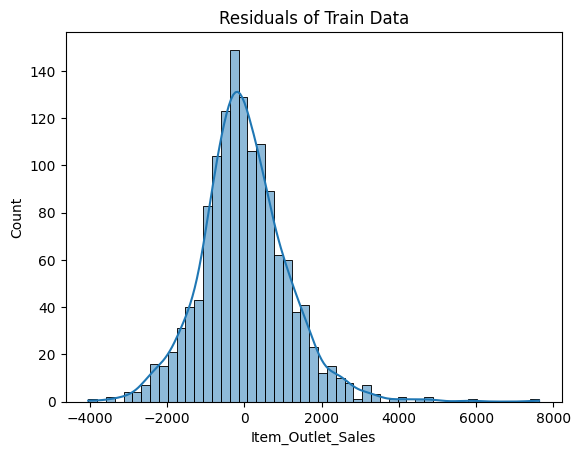

In [7]:
residuals_train = train_y - predict_train
sns.histplot(residuals_train, kde=True)
plt.title('Residuals of Train Data')
plt.savefig('train_residuals_plot.png')
plt.show()

Biểu đồ trên là biểu đồ phân phối phần dư (residuals) của dữ liệu huấn luyện, gồm các cột và một đường cong phân phối (KDE).

### 1. **Trục tung (Count)**: 
- Trục tung hiển thị **số lượng mẫu** có giá trị phần dư (residual) tương ứng trên trục hoành. Mỗi cột biểu diễn số lượng các điểm dữ liệu có phần dư nằm trong một khoảng cụ thể.

### 2. **Trục hoành (Residuals of Train Data - Item_Outlet_Sales)**: 
- Trục hoành biểu diễn **giá trị phần dư** (residuals), tức là sự chênh lệch giữa giá trị thực tế (`Item_Outlet_Sales`) và giá trị dự đoán từ mô hình hồi quy tuyến tính. Phần dư = Giá trị thực tế - Giá trị dự đoán.
- Giá trị phần dư gần 0 có nghĩa là mô hình dự đoán khá chính xác, trong khi giá trị phần dư lớn (âm hoặc dương) có nghĩa là mô hình có sai số lớn.

### 3. **Cột histogram**:
- Các cột biểu diễn **số lượng mẫu** trong từng khoảng giá trị phần dư. Các cột tập trung nhiều nhất quanh giá trị phần dư 0, cho thấy đa số dự đoán của mô hình khá gần với giá trị thực tế.

### 4. **Đường cong KDE (Kernel Density Estimate)**: 
- Đường cong mượt này biểu diễn phân phối xác suất của các giá trị phần dư. Nó giúp ta quan sát hình dạng của phân phối dễ dàng hơn so với chỉ nhìn vào histogram.
- Đường cong gần đối xứng quanh 0, cho thấy phần dư phân bố khá đồng đều.

### **Nhận xét**:
- **Phân phối chuẩn**: Phần lớn phần dư tập trung quanh giá trị 0 và có dạng phân phối chuẩn, điều này cho thấy mô hình có thể dự đoán tương đối tốt đối với hầu hết các dữ liệu huấn luyện.
- **Lệch đuôi (Tails)**: Tuy nhiên, có một số phần dư khá lớn ở cả hai phía (trái và phải). Điều này có nghĩa rằng mô hình hồi quy tuyến tính không dự đoán chính xác với một số dữ liệu, dẫn đến những phần dư cực đại. Những giá trị này có thể là dấu hiệu của các điểm ngoại lệ (outliers) hoặc do mô hình chưa phù hợp với tính chất dữ liệu.

### **Kết luận**:
- Mô hình hoạt động tốt cho phần lớn các điểm dữ liệu với phần dư nhỏ, nhưng có một số mẫu có sai số lớn hơn.
- Bạn có thể xem xét điều chỉnh mô hình hoặc xử lý các điểm ngoại lệ để cải thiện độ chính xác.

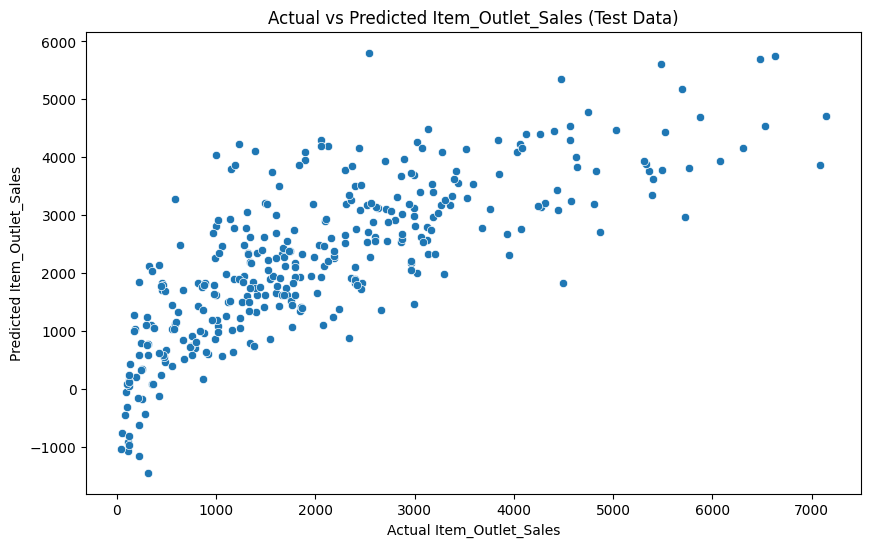

In [8]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test_y, y=predict_test)
plt.xlabel('Actual Item_Outlet_Sales')
plt.ylabel('Predicted Item_Outlet_Sales')
plt.title('Actual vs Predicted Item_Outlet_Sales (Test Data)')
plt.savefig('test_predictions_plot.png')
plt.show()

Biểu đồ trên là một biểu đồ tán xạ (scatter plot) so sánh giữa giá trị thực tế của `Item_Outlet_Sales` (trục hoành - Actual) và giá trị dự đoán của `Item_Outlet_Sales` (trục tung - Predicted) trên dữ liệu thử nghiệm.

### 1. **Mối tương quan giữa giá trị thực tế và giá trị dự đoán:**
   - Biểu đồ thể hiện sự tương quan giữa giá trị dự đoán và giá trị thực tế của doanh số bán hàng (`Item_Outlet_Sales`). Đa phần các điểm dữ liệu đều nằm gần đường chéo từ góc dưới trái đến góc trên phải, thể hiện rằng mô hình có thể dự đoán khá tốt doanh số bán hàng khi các giá trị thực tế nằm trong khoảng từ 0 đến 4000.
   - Tuy nhiên, vẫn có một số điểm dữ liệu nằm lệch xa khỏi đường chéo, điều này cho thấy có những trường hợp mô hình dự đoán không chính xác, đặc biệt là khi giá trị thực tế lớn hơn 5000.

### 2. **Sai số lớn ở các giá trị thấp:**
   - Ở khu vực doanh số bán hàng thấp (gần 0), một số điểm dự đoán âm xuất hiện (trục tung có giá trị dưới 0). Điều này là không hợp lý vì doanh số bán hàng không thể âm. Những điểm này cho thấy mô hình có sai số lớn ở các giá trị thấp của `Item_Outlet_Sales`.

### 3. **Dự đoán dưới mức ở các giá trị cao:**
   - Ở phần dữ liệu mà giá trị thực tế lớn hơn 5000 (góc phải phía trên), mô hình thường có xu hướng dự đoán thấp hơn thực tế. Điều này cho thấy mô hình đang gặp khó khăn trong việc dự đoán chính xác các giá trị doanh số bán hàng cao.

### 4. **Phân bố dữ liệu:**
   - Phần lớn các điểm dữ liệu tập trung ở khu vực giá trị `Item_Outlet_Sales` trong khoảng từ 1000 đến 4000, cho thấy rằng đa phần các sản phẩm hoặc cửa hàng có doanh số bán hàng nằm trong khoảng này.
   - Điều này cũng có thể là do sự phân bố không đồng đều trong tập dữ liệu, với phần lớn sản phẩm có doanh số vừa phải, và ít sản phẩm có doanh số rất cao hoặc rất thấp.

### 5. **Hiệu suất của mô hình:**
   - Mô hình hoạt động tốt trong khoảng doanh số trung bình (1000 đến 4000) nhưng cần cải thiện ở hai đầu: các sản phẩm có doanh số thấp (gần 0) và cao (trên 5000).
   - Có thể cần phải cải thiện thêm các yếu tố như đặc trưng (features) của mô hình hoặc điều chỉnh mô hình để tăng tính chính xác trong việc dự đoán doanh số bán hàng.

---

## Biểu đồ này cho thấy mô hình có hiệu suất dự đoán khá tốt, nhưng có thể cải thiện thêm ở các trường hợp ngoại lệ, đặc biệt là với các giá trị doanh số bán hàng rất cao hoặc rất thấp.

In [9]:
#Xuất kết quả dự đoán dưới dạng file excel:
!pip install openpyxl
output = pd.DataFrame({'Actual': test_y, 'Predicted': predict_test})
output.to_excel('test_predictions.xlsx', index=False)
print('Predictions saved to test_predictions.xlsx')


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Predictions saved to test_predictions.xlsx


# Sử dụng RandomForest (kết quả gần tương tự):

In [10]:
from sklearn.ensemble import RandomForestRegressor

# Khởi tạo model RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Huấn luyện model trên tập train
rf_model.fit(train_x, train_y)

# Dự đoán trên tập train và test
predict_train_rf = rf_model.predict(train_x)
predict_test_rf = rf_model.predict(test_x)

# Tính toán RMSE
rmse_train_rf = mean_squared_error(train_y, predict_train_rf)**0.5
rmse_test_rf = mean_squared_error(test_y, predict_test_rf)**0.5

print('\nRMSE on training dataset (RandomForest):', rmse_train_rf)
print('RMSE on test dataset (RandomForest):', rmse_test_rf)


RMSE on training dataset (RandomForest): 439.5401760594965
RMSE on test dataset (RandomForest): 1063.7971809778314


# Sử dụng GradientBoosting (kết quả gần tương tự):

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

# Khởi tạo model GradientBoosting
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Huấn luyện model
gb_model.fit(train_x, train_y)

# Dự đoán trên tập train và test
predict_train_gb = gb_model.predict(train_x)
predict_test_gb = gb_model.predict(test_x)

# Tính toán RMSE
rmse_train_gb = mean_squared_error(train_y, predict_train_gb)**0.5
rmse_test_gb = mean_squared_error(test_y, predict_test_gb)**0.5

print('\nRMSE on training dataset (GradientBoosting):', rmse_train_gb)
print('RMSE on test dataset (GradientBoosting):', rmse_test_gb)


RMSE on training dataset (GradientBoosting): 898.4989657839984
RMSE on test dataset (GradientBoosting): 1002.4635353731132
